<a href="https://colab.research.google.com/github/Shailesh0209/x_Machine_Learning_Practicals-diploma-IITM/blob/main/x_W1_Wine_Quality(ML_Projects)_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(data_url, sep=";")

## Check data samples

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Features

In [4]:
feature_list = data.columns[:-1].values
label = [data.columns[-1]]

print("Feature List:", feature_list)
print("Label:", label)

Feature List: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label: ['quality']


## Data statistics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
## numeric attributes
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Count')

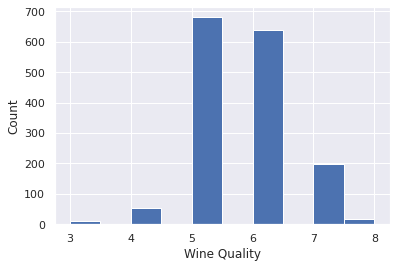

In [8]:
sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

#data.total_sulfur_dioxide.hist()

## Create test set

In [9]:
def split_train_test(data, test_ratio):
    # Set the random seed.
    np.random.seed(42)

    # Shuffle the dataset
    shuffled_indices = np.random.permutation(len(data))

    # Calculate the size of the test set.
    test_set_size = int(len(data) * test_ratio)

    # split dataset to get training and test sets.
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(data, 0.2)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# Perform random sampling on our dataset:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

## Stratified sampling

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["quality"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [14]:
strat_dist = strat_test_set["quality"].value_counts() / len(strat_test_set)

In [15]:
overall_dist = data["quality"].value_counts() / len(data)

In [16]:
# Let's look at them side-by-side
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(s-o)_pct'] = 100*(dist_comparison['diff(s-o)']/dist_comparison['overall'])

In [17]:
dist_comparison

,overall,stratified,diff(s-o),diff(s-o)_pct
5,0.425891,0.425000,-0.000891,-0.209251
6,0.398999,0.400000,0.001001,0.250784
7,0.124453,0.125000,0.000547,0.439698
4,0.033146,0.034375,0.001229,3.708726
8,0.011257,0.009375,-0.001882,-16.718750
3,0.006254,0.006250,-0.000004,-0.062500


In [18]:
# Let's contrast this with random sampling:
random_dist = test_set["quality"].value_counts() / len(test_set)
random_dist

6    0.412500
5    0.406250
7    0.131250
4    0.031250
8    0.015625
3    0.003125
Name: quality, dtype: float64

In [19]:
# Sampling bias comparison
dist_comparison.loc[:, ['diff(s-o)_pct', 'diff(r-o)_pct']]

KeyError: ignored

## Data Visualization

In [20]:
exploration_set = strat_train_set.copy()

### Scatter Visualization

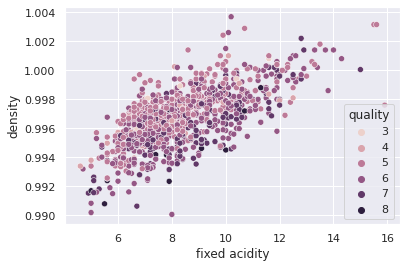

In [21]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality',
                data=exploration_set)

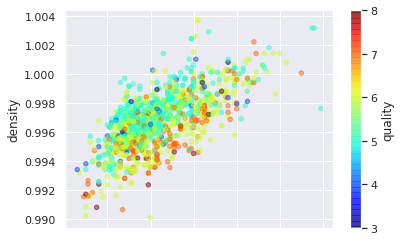

In [22]:
## with matplotlib
exploration_set.plot(kind='scatter', x='fixed acidity',
                     y='density', alpha=0.5,
                     c="quality", cmap=plt.get_cmap("jet"))

In [23]:
corr_matrix = exploration_set.corr() # corr funcn to calculate correlation

In [24]:
corr_matrix['quality']

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

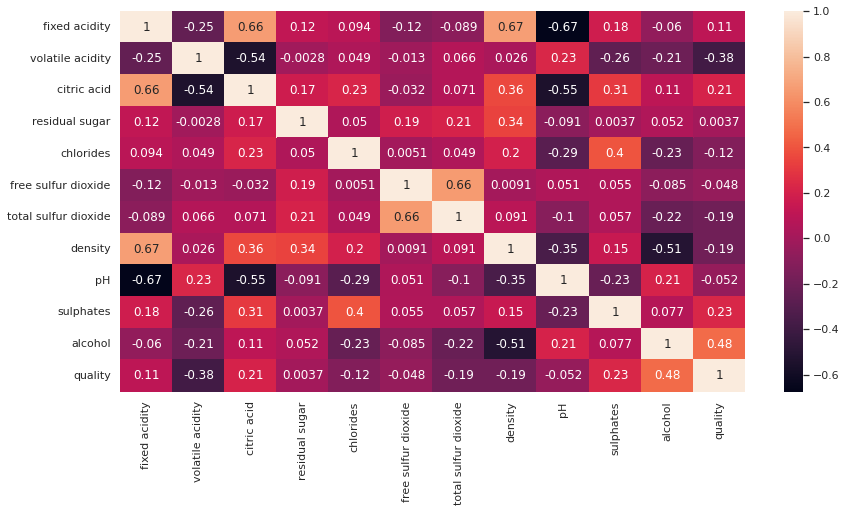

In [25]:
# correlation matrix with heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac5a998910>,
      dtype=object)

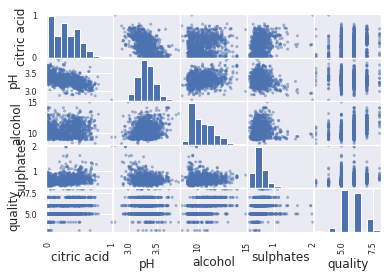

In [26]:
from pandas.plotting import scatter_matrix
attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
scatter_matrix(exploration_set[attribute_list])

# Prepare data for ML algorithm

## Separate features and labels from the training set.

In [27]:
# Copy all features leaving aside the label.
wine_features = strat_train_set.drop("quality", axis=1) 

# Copy the label list
wine_labels = strat_train_set['quality'].copy()

## Data cleaning

In [28]:
wine_features.isna().sum() # counts the no. of NaN in each column of wine_feature


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [30]:
imputer.fit(wine_features)

SimpleImputer(strategy='median')

In [31]:
# Let's check the statistics learnt by the imputer on the training set
imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [32]:
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [33]:
tr_features = imputer.transform(wine_features)

In [34]:
tr_features.shape

(1279, 11)

In [35]:
wine_features_tr = pd.DataFrame(tr_features, columns=wine_features.columns)

## Handling text and categorical attributes

### Converting categories to numbers:

In [36]:
#### 
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [37]:
## Using One hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

## Transformation Pipeline


*   Scikit-Learn provides a Pipeline class to line up transformations in an intended order.




In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
transform_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
])
wine_features_tr = transform_pipeline.fit_transform(wine_features)



*   Pipeline has a sequence of transformations - missing value imputation followed by standardization.
*   Each step in the sequence is defined by name, estimator pair.
*   Each name should be unique and **should not contain__**(double underscore
* The output of one step is passed on the next one in sequence until it reaches the last step.
    - Here the pipeline first performs imputation of missing values and its result is passed for standardization.
* The pipeline exposes the same method as the final estimator.
    - Here StandardScaler is the last estimator and since it is a transformer, we call fit_transform() method on the Pipeline object.


In [39]:
# transform mixed features
from sklearn.compose import ColumnTransformer

In [40]:
num_attribs = list(wine_features)
cat_attribs = ["place_of_manufacturing"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])
wine_features_tr = full_pipeline.fit_transform(wine_features)

NameError: ignored

# Selection and training of ML models

In this case wine quality prediction, Since quality is a number, so we can use linear regression model as a quick baseline

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

evaluating performance of the model on training as well as test sets.
- For regression models, we use mean squared error as an evaluation measure.

In [42]:
from sklearn.metrics import mean_squared_error

quality_predictions = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.4206571060060277

Let's evaluate performance on the test set.
- We need to first apply transformation on the test set and then apply the model prediction function.

In [43]:
# copy all features leaving aside the label.
wine_features_test = strat_test_set.drop("quality", axis=1)

# copy the label list
wine_labels_test = strat_test_set['quality'].copy()

# apply transformations
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

# call predict function and calculate MSE.
quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.3975913087501518

Let's visualize the error b/w the actual and predicted values

Text(0, 0.5, 'Predicted quality')

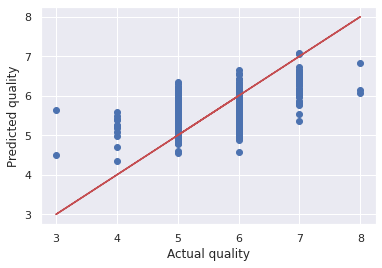

In [44]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

The model seem to be making errors on the best and poor quality wines.